In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips');

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Users\Shahbaz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

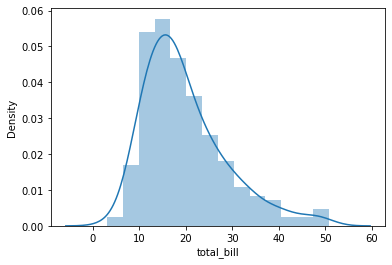

In [10]:
# univariant/single variable plot
sns.distplot(tips['total_bill'])

C:\Users\Shahbaz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill'>

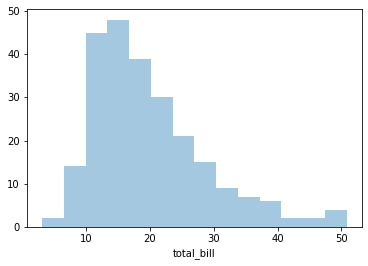

In [18]:
sns.distplot(tips['total_bill'], kde=False)

<AxesSubplot:xlabel='total_bill'>

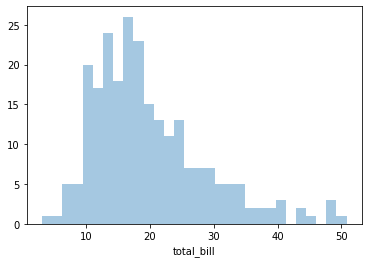

In [19]:
sns.distplot(tips['total_bill'], kde=False, bins=30)

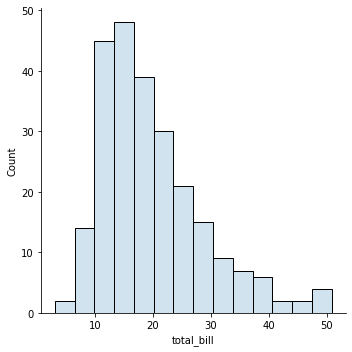

In [17]:
sns.displot(tips['total_bill'], alpha = 0.2)

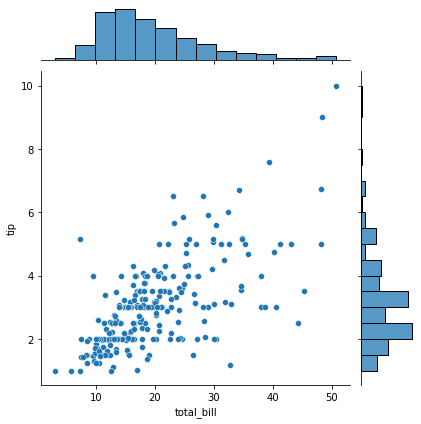

In [23]:
# jointplot: allows distplot/displot data to be joined with bivariate data
# essentially, we combine 2 different distribution plots; bivariate: 2 variables
sns.jointplot(x='total_bill', y='tip', data=tips)

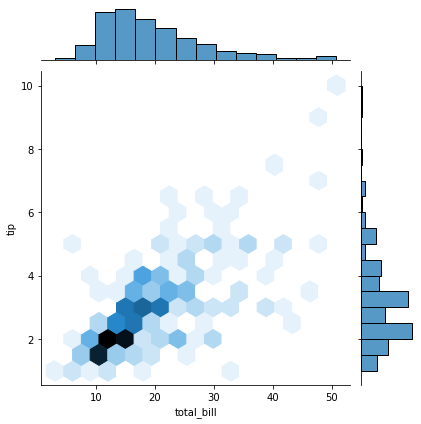

In [24]:
# the 'kind' param defines the type of central plot we generate
sns.jointplot(x='total_bill', y='tip', data=tips, kind = 'hex');

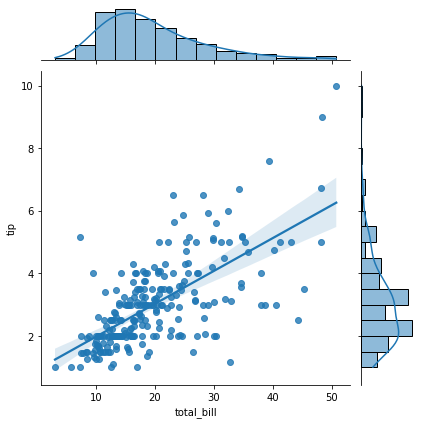

In [25]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind = 'reg');

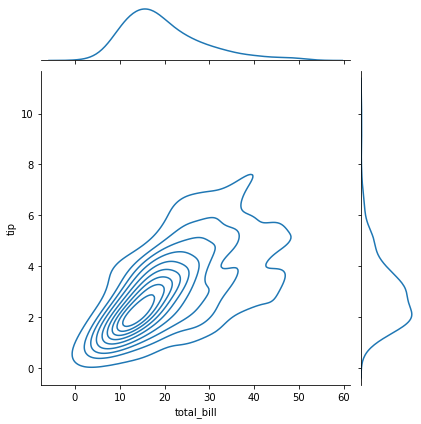

In [26]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind = 'kde');

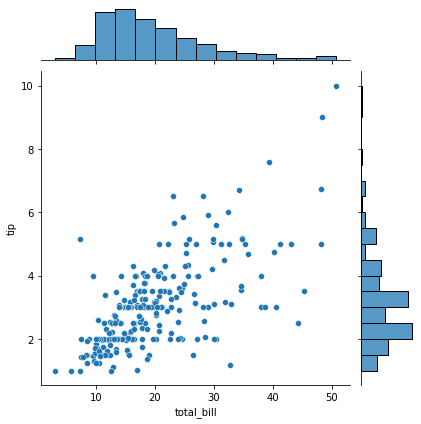

In [28]:
sns.jointplot(x='total_bill', y='tip', data=tips);

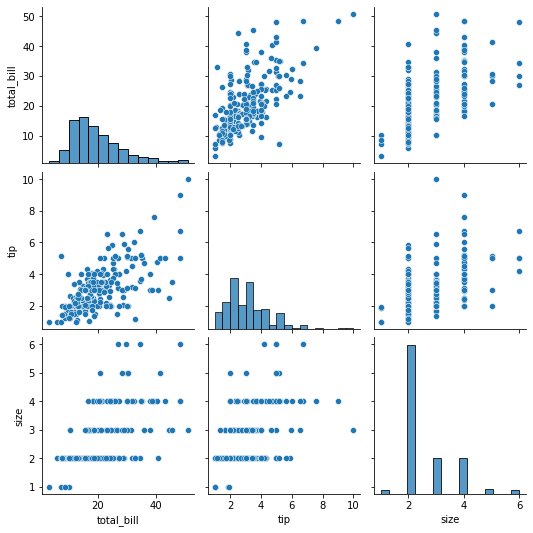

In [29]:
# pairplot: plots pair-wise relationships across entire dataframes; at least for numerical columns
# NOTE: also supports hue columns for categorical columns
sns.pairplot(tips);

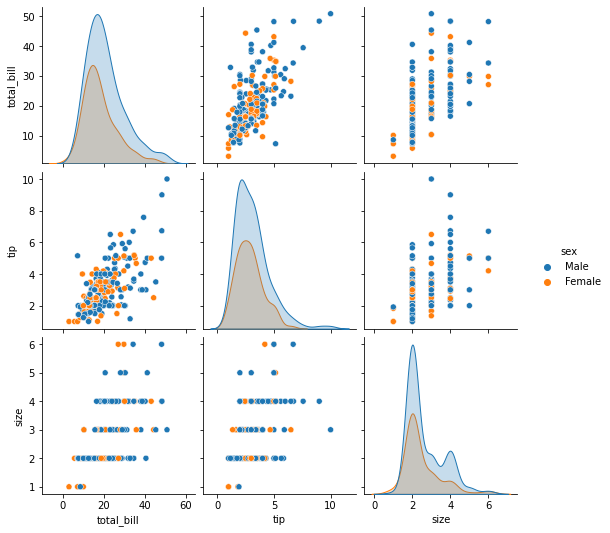

In [30]:
sns.pairplot(tips, hue= 'sex');

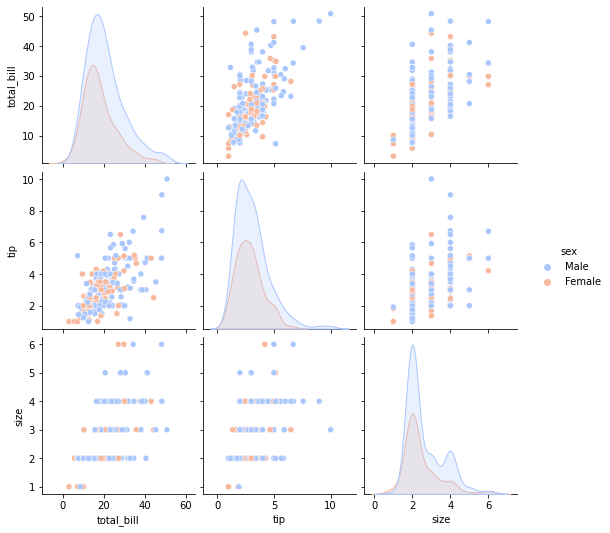

In [31]:
sns.pairplot(tips, hue= 'sex', palette='coolwarm');

<AxesSubplot:xlabel='total_bill'>

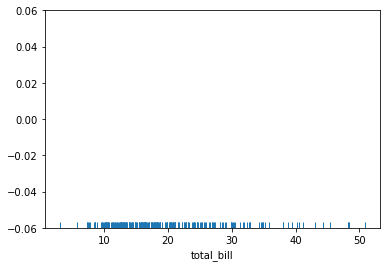

In [33]:
# unlike a histogram, a rugplot is a bird's eye view of a histogram, sort of...
sns.rugplot(tips['total_bill'])

In [34]:
# the distplot kde: kernel density estimation plot!
# normal distribution (probability): the most common, continuous distribution
#      goes like "how did everyone do on their test?", "ages?", "heights?"


(0.0, 1.0)

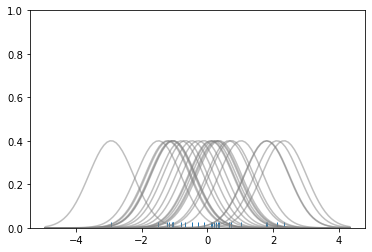

In [35]:
# KDE PLOTS
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

In [36]:
# to get kernel density basis function:

Text(0.5, 0.98, 'Sum of the Basis Functions')

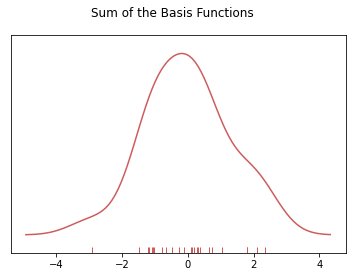

In [37]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

In [38]:
# NOTE: kde is basically the sum of normal distributions along a rugplot

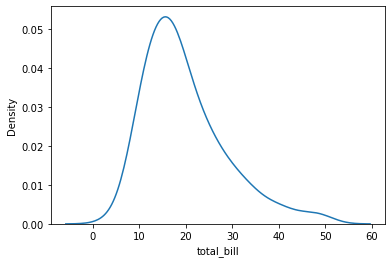

In [39]:
sns.kdeplot(tips['total_bill']); # for creating a distplot/displot without the histogram

# Categorical Plots

In [9]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
import numpy as np;

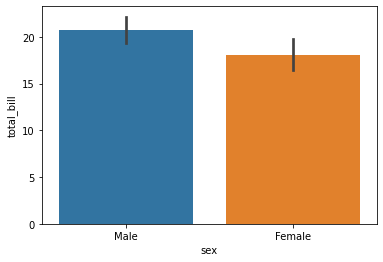

In [12]:
# barplot: a general plot that allows us to aggregate the categorical data
# based off of some function
# think: visualization of group by action
sns.barplot(x= 'sex', y= 'total_bill', data=tips); #estimator is 'mean()' by default but can be any statistical aggregate function

In [8]:
# NOTE: the above plot shows that the average total bill is higher for males than females

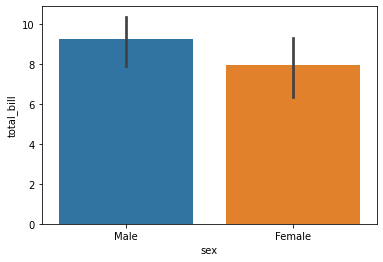

In [13]:

sns.barplot(x= 'sex', y= 'total_bill', data=tips, estimator = np.std); #estimator is 'mean()' by default but can be any statistical aggregate function

<AxesSubplot:xlabel='sex', ylabel='count'>

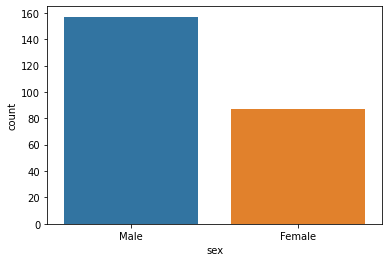

In [16]:
# counplot: basically a bar plot but the Y axis is assigned to the occurence count value
sns.countplot(x = 'sex', data = tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

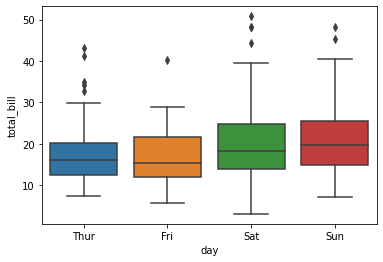

In [17]:
# boxplot: (box-and-whiskers plot)

sns.boxplot(x='day', y='total_bill', data=tips)

In [18]:
# the box contains the quartiles of the data-set 
# while the whiskers show the rest of the data
# anything outside the whiskers is an outlier

<AxesSubplot:xlabel='day', ylabel='total_bill'>

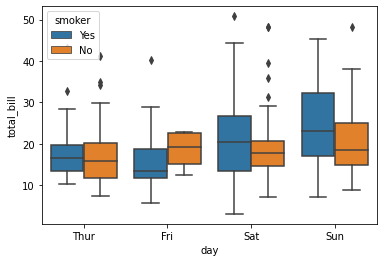

In [19]:
sns.boxplot(x='day', y='total_bill', data=tips, hue= 'smoker')

In [20]:
# the hue added the smoker data series and plots them on the graph

<AxesSubplot:xlabel='day', ylabel='total_bill'>

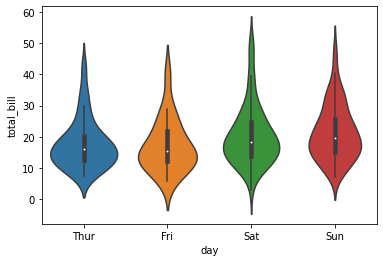

In [23]:
# violin plot: similar to boxplot; as in shows the distribution 
# in the categories
sns.violinplot(x='day', y='total_bill', data=tips)

In [24]:
# NOTE: unlike a boxplot, a violin plot allows us to plot all the data
# components. It essentially shows the kernel density estimation of the
# underlying distribution

<AxesSubplot:xlabel='day', ylabel='total_bill'>

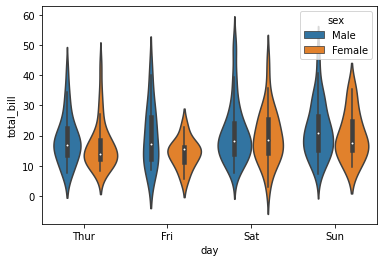

In [25]:
sns.violinplot(x='day', y='total_bill', data=tips, hue = 'sex')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

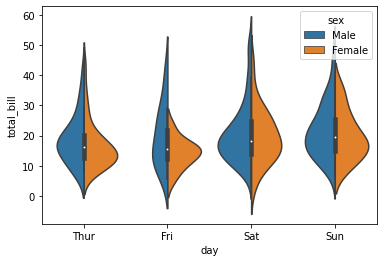

In [26]:
# violin plots, unlike boxplots, also allow split plots!
sns.violinplot(x='day', y='total_bill', data=tips, hue = 'sex', split = True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

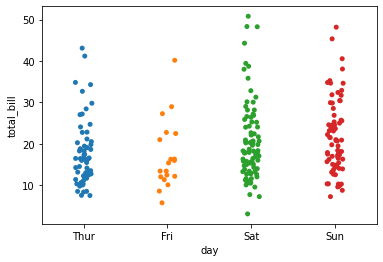

In [27]:
# stripplot: draws a scatter plot where 1 variable is categorical
sns.stripplot (x = 'day', y = 'total_bill', data = tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

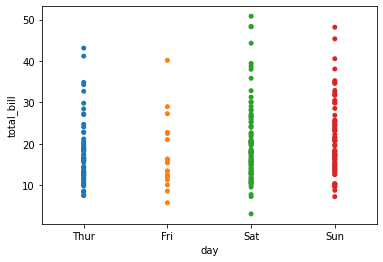

In [29]:
# jitter adds some noise to the plot to make points easier to see
# it is better to have jitter set to true as it makes the graph clearer
sns.stripplot (x = 'day', y = 'total_bill', data = tips, jitter = False)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

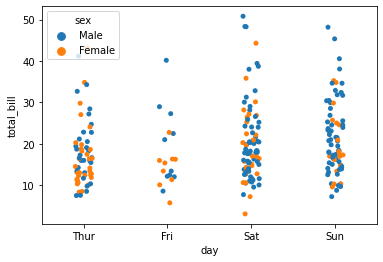

In [31]:
# stripplots also have hue
sns.stripplot (x = 'day', y = 'total_bill', data = tips, jitter = True, hue = 'sex')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

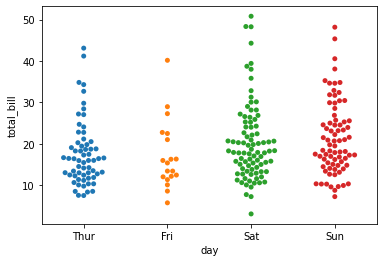

In [33]:
# swarm plot: a combo of a strip plot and a violin plot
# The swarm plot has points adjusted to nor overlap, which makes it better
sns.swarmplot(x = 'day', y = 'total_bill', data = tips)

In [34]:
# NOTE: One drawback is that swarmplots don't scale well to large numbers
# suggested to stay away from these as most people haven't seen these a lot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

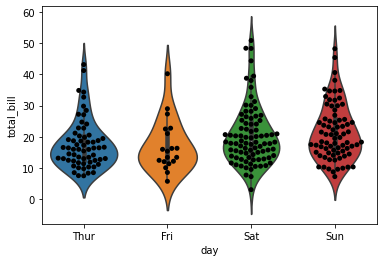

In [35]:
# swarm plots can be combo's with a violin plot to show both data stacked
# on top of each other

sns.violinplot(x = 'day', y= 'total_bill', data=tips)
sns.swarmplot(x = 'day', y = 'total_bill', data = tips, color = 'black')

C:\Users\Shahbaz\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


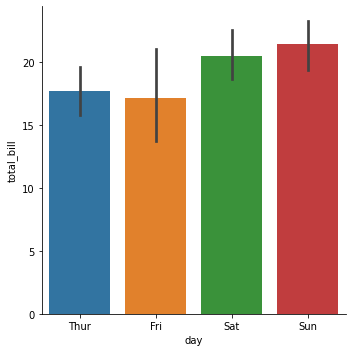

In [37]:
# factor plot: the most general form of all the shown plots
# the 'kind' param defines the plot
sns.factorplot(x = 'day', y = 'total_bill', data = tips, kind = 'bar')

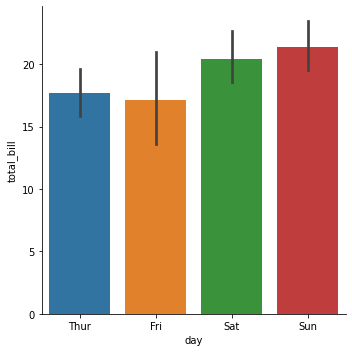

In [42]:
# factorplot has been deprecated and renamed to catplot; 
# and 'kind' value 'strip' has been changed to 'point'
sns.catplot(x = 'day', y = 'total_bill', data = tips, kind = 'bar')

# Matrix Plots

In [43]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [44]:
# in order for a heatmap to work properly, your data should already be
# in a matrix form; i.e. the index names and column names match up so
# that the value in a cell says somthing relevant to both of those names

In [48]:
# E.G.: in tips, total_bill's index vals are hollow and have no meaning
# since it's raw indexing
# in order to get it into matrix form, we need to have both variables on
# the columns and the rows. we can do that by:

tc = tips.corr()

<AxesSubplot:>

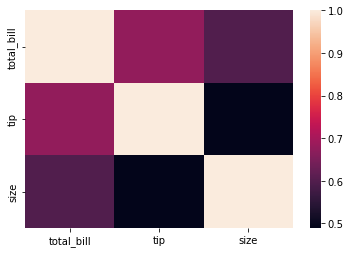

In [49]:
# now, we can call heatmap on it:

sns.heatmap(tc)

In [50]:
# a heamap basically colors in the values to a gradient on a color scale
# and then fills them in

<AxesSubplot:>

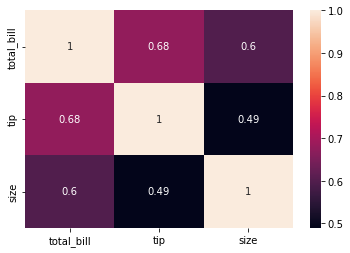

In [51]:
sns.heatmap(tc, annot=True)

<AxesSubplot:>

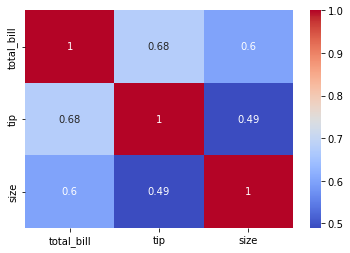

In [52]:
sns.heatmap(tc, annot=True, cmap = 'coolwarm')

In [53]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [56]:
# to make it into matrix form:

fp = flights.pivot_table(index = 'month', columns = 'year', values = 'passengers');
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

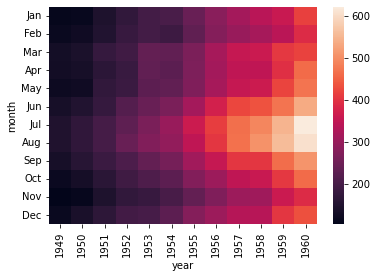

In [57]:
sns.heatmap(fp)

<AxesSubplot:xlabel='year', ylabel='month'>

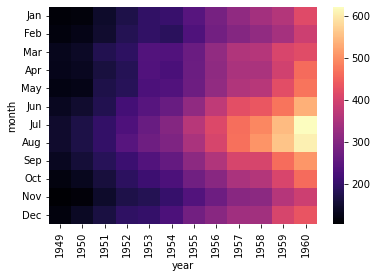

In [58]:
sns.heatmap(fp, cmap='magma')

<AxesSubplot:xlabel='year', ylabel='month'>

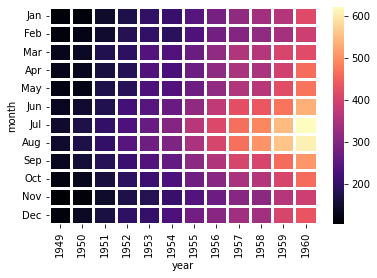

In [60]:
sns.heatmap(fp, cmap= 'magma', linecolor='white', linewidth= 3)

<AxesSubplot:xlabel='year', ylabel='month'>

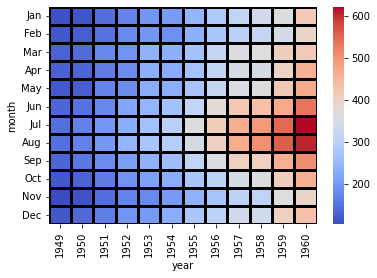

In [61]:
sns.heatmap(fp, cmap= 'coolwarm', linecolor='black', linewidth= 3)

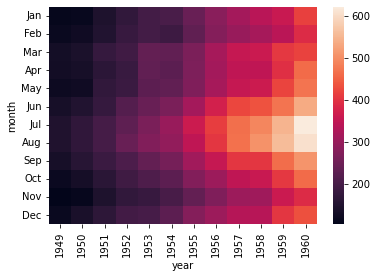

In [62]:
sns.heatmap(fp);

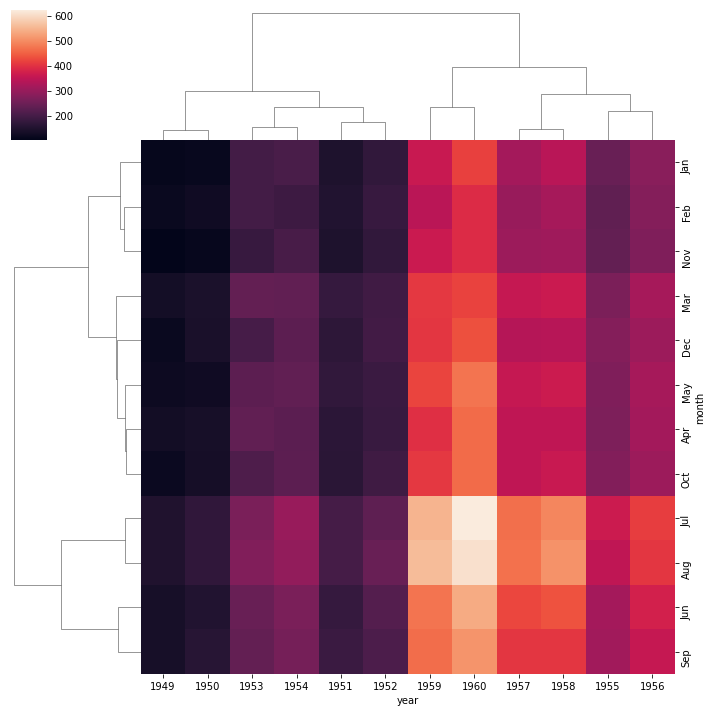

In [64]:
# clustermap: uses hierarchal clustering to produce a clustered version of 
# the heatmap
sns.clustermap(fp)

In [65]:
# clustermapping basically tries to cluster rows anc columns together based
# on their similarities. It essentially shows the years and months in clusters
# here
# NOTE: notice how the order of the months has been changed to club similar
# ones together

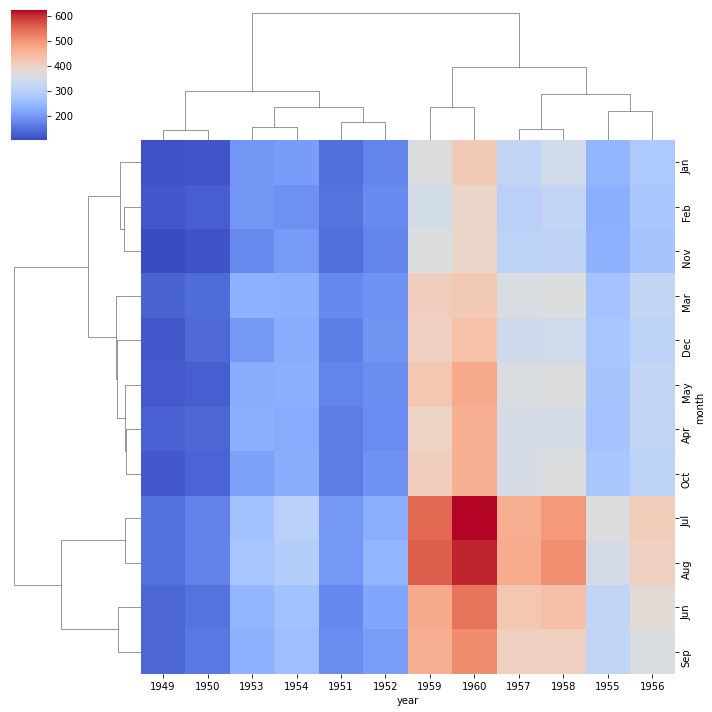

In [68]:
sns.clustermap(fp, cmap='coolwarm')

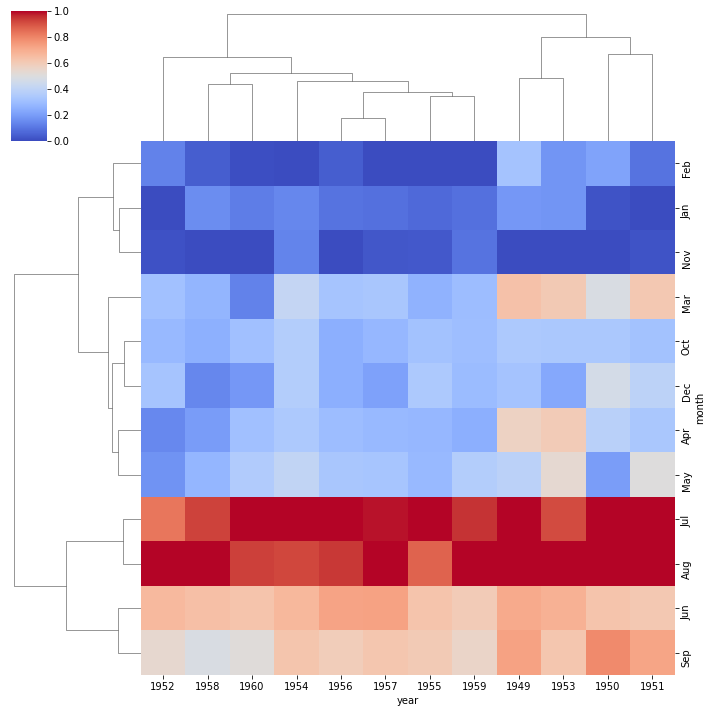

In [69]:
# we can also normalize clustermaps

sns.clustermap(fp, cmap = 'coolwarm', standard_scale=1);

# Grids

In [70]:
iris = sns.load_dataset('iris');
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [71]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

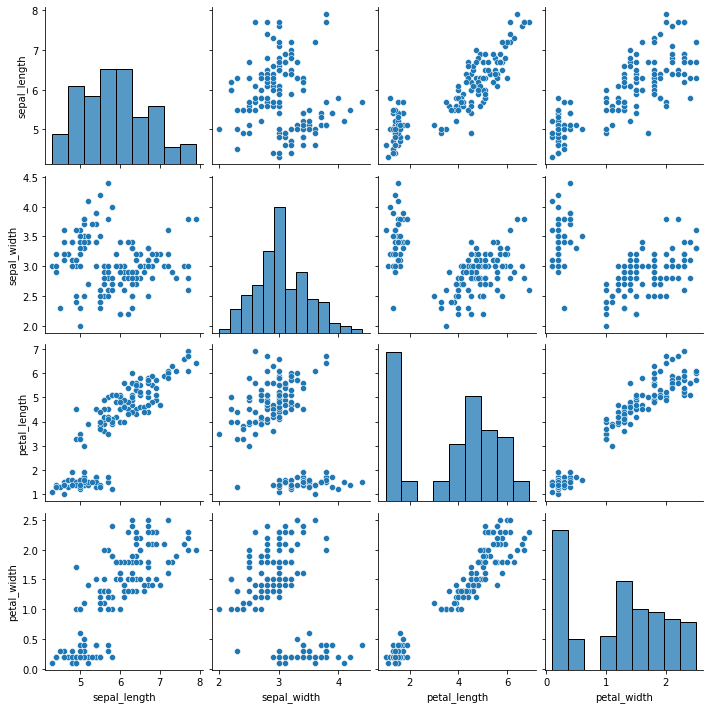

In [72]:
sns.pairplot(iris);

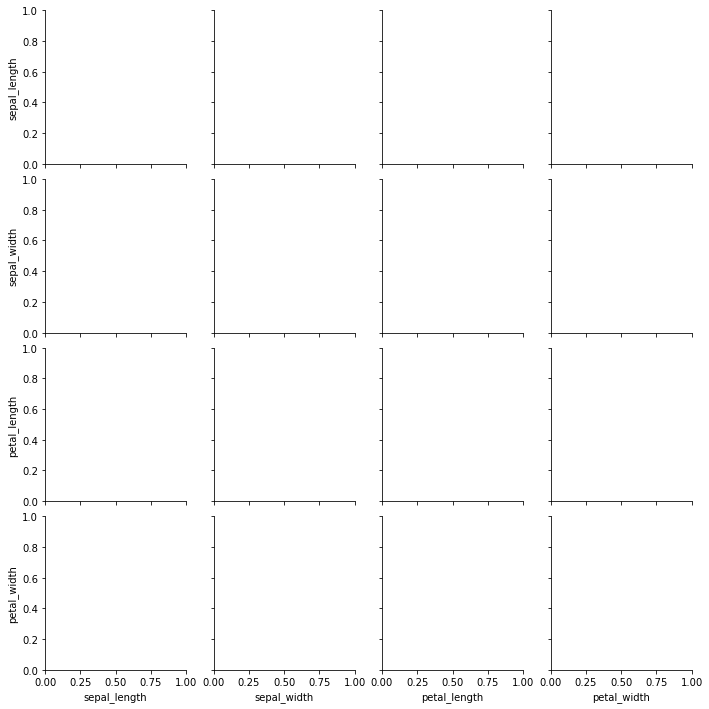

In [74]:
g = sns.PairGrid(iris);

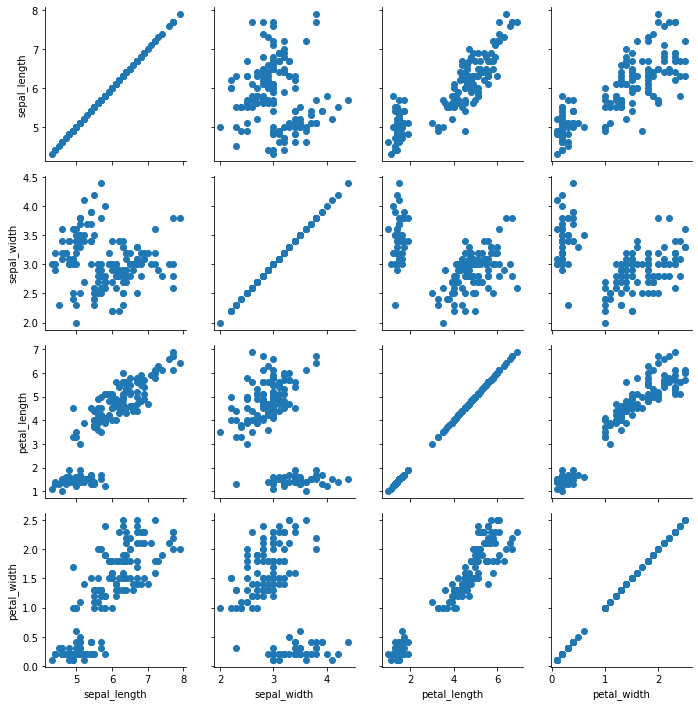

In [76]:
import matplotlib.pyplot as plt
g.map(plt.scatter);

C:\Users\Shahbaz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shahbaz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shahbaz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

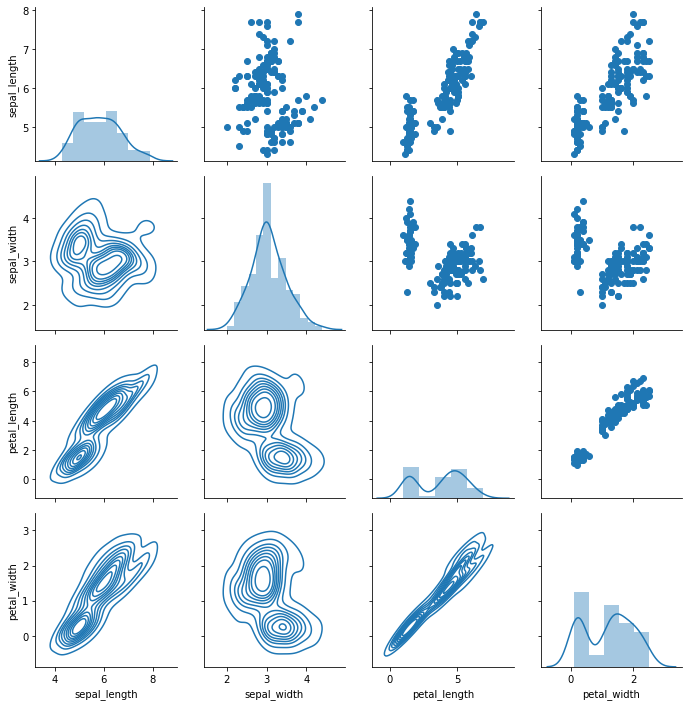

In [79]:
g = sns.PairGrid(iris);
g.map_diag(sns.distplot);
g.map_upper(plt.scatter);
g.map_lower(sns.kdeplot);

In [81]:
tips = sns.load_dataset('tips');
tips.head();

C:\Users\Shahbaz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shahbaz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shahbaz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

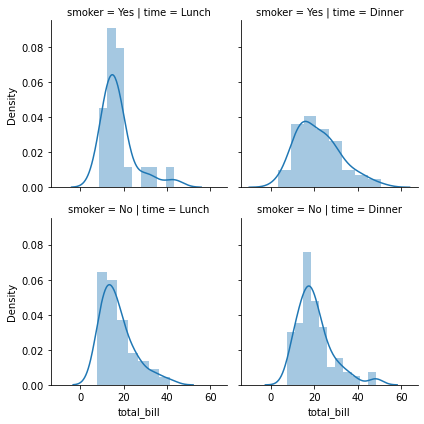

In [85]:
# facetGrid: similar to subplots in matplotlib, but instead of saying/passing
# numbers, we instead pass column names and row names of dataframe
g = sns.FacetGrid(data = tips, col= 'time', row= 'smoker')
g.map(sns.distplot, 'total_bill')

In [86]:
# yes and no to 'smoker' are the rows and the time (lunch or dinner)
# is specified in the columns

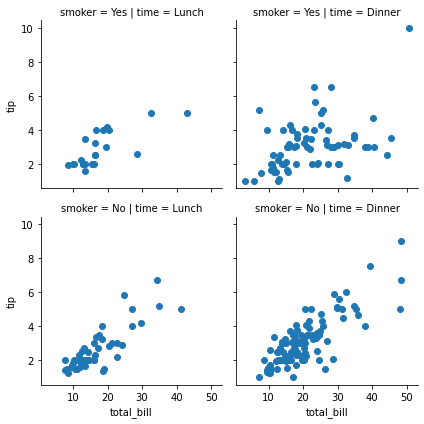

In [89]:
g = sns.FacetGrid(data = tips, col= 'time', row= 'smoker')
g.map(plt.scatter, 'total_bill', 'tip') # the scatter needs 2 arguments so it won't run with only a 'total_bill' argument

# Regression Plots

In [90]:
# lmplot: allows us to display linear models with seaborn

In [91]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


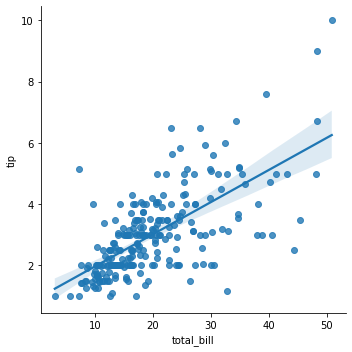

In [92]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips)

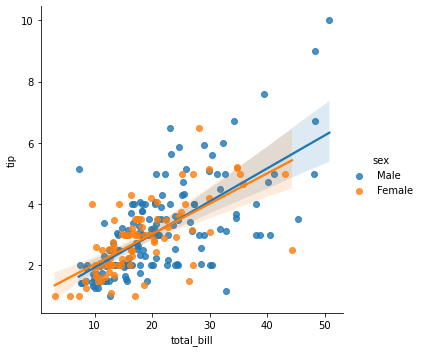

In [93]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue= 'sex')

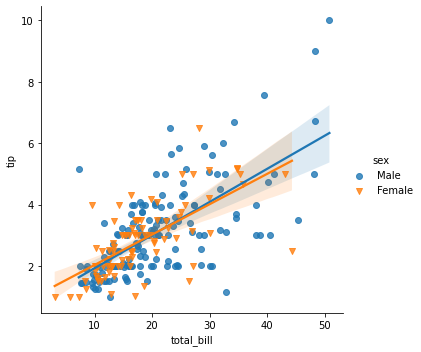

In [95]:
# to distinguish some markers, we can also use matplotlib params on these plots
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', markers= ['o', 'v'])

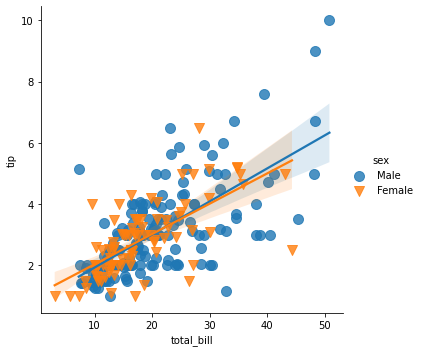

In [97]:
# to make data larger, we can pass a 'scatter_kws' parameter
# since seaborn pretty much calls matplotlib under the hood anyway,
# we can also directly access the matplotlib attribs/props using the
# scatter_kws param here; it takes input as a dictionary
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', markers= ['o', 'v'],
          scatter_kws={'s':100})

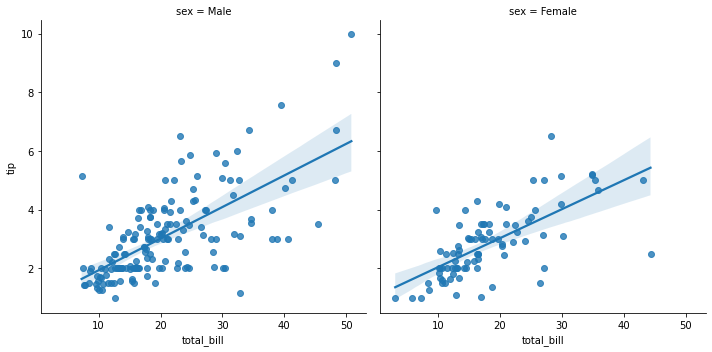

In [99]:
# instead of passing vals. as hue, we can also start calling 
# col to separate by column instead of colors
sns.lmplot(x = 'total_bill', y= 'tip', data= tips, col='sex')

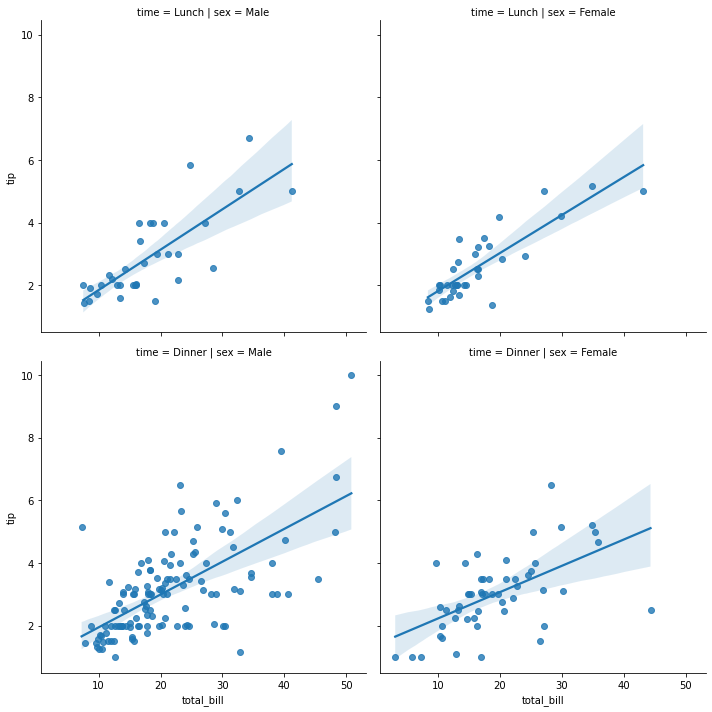

In [100]:
# we can similart do this with rows
sns.lmplot(x = 'total_bill', y= 'tip', data= tips, col='sex', row = 'time')

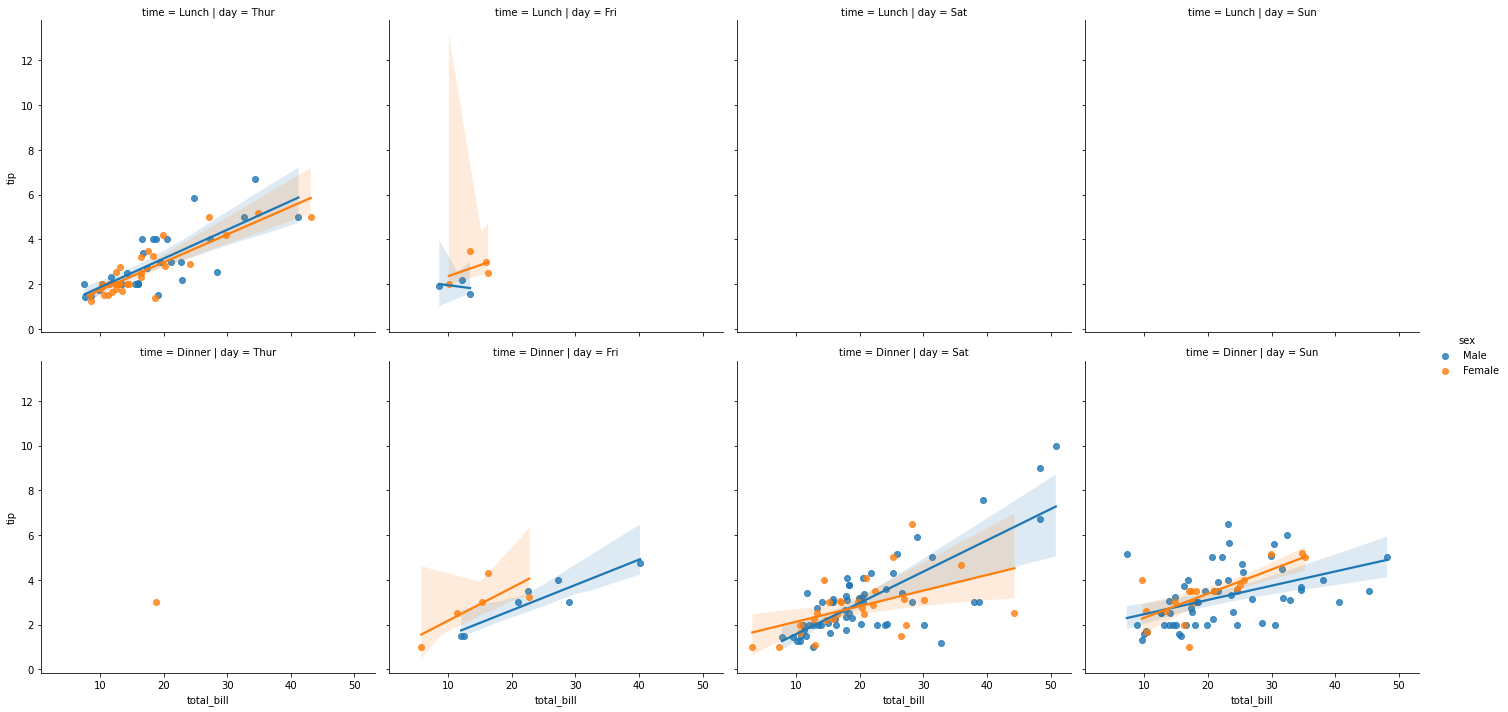

In [103]:
sns.lmplot(x = 'total_bill', y= 'tip', data= tips, col='day', row = 'time', hue = 'sex')

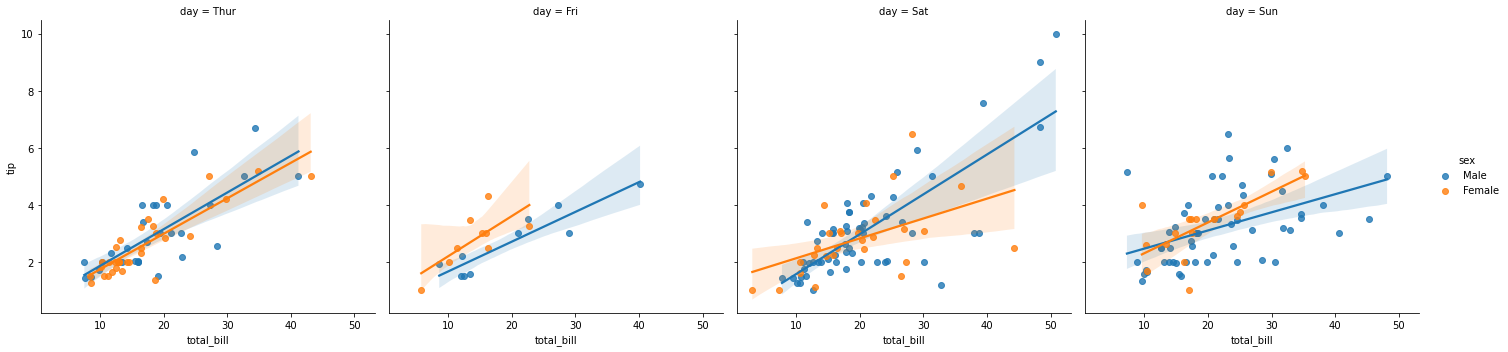

In [104]:
sns.lmplot(x = 'total_bill', y= 'tip', data= tips, col='day', hue = 'sex')

C:\Users\Shahbaz\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


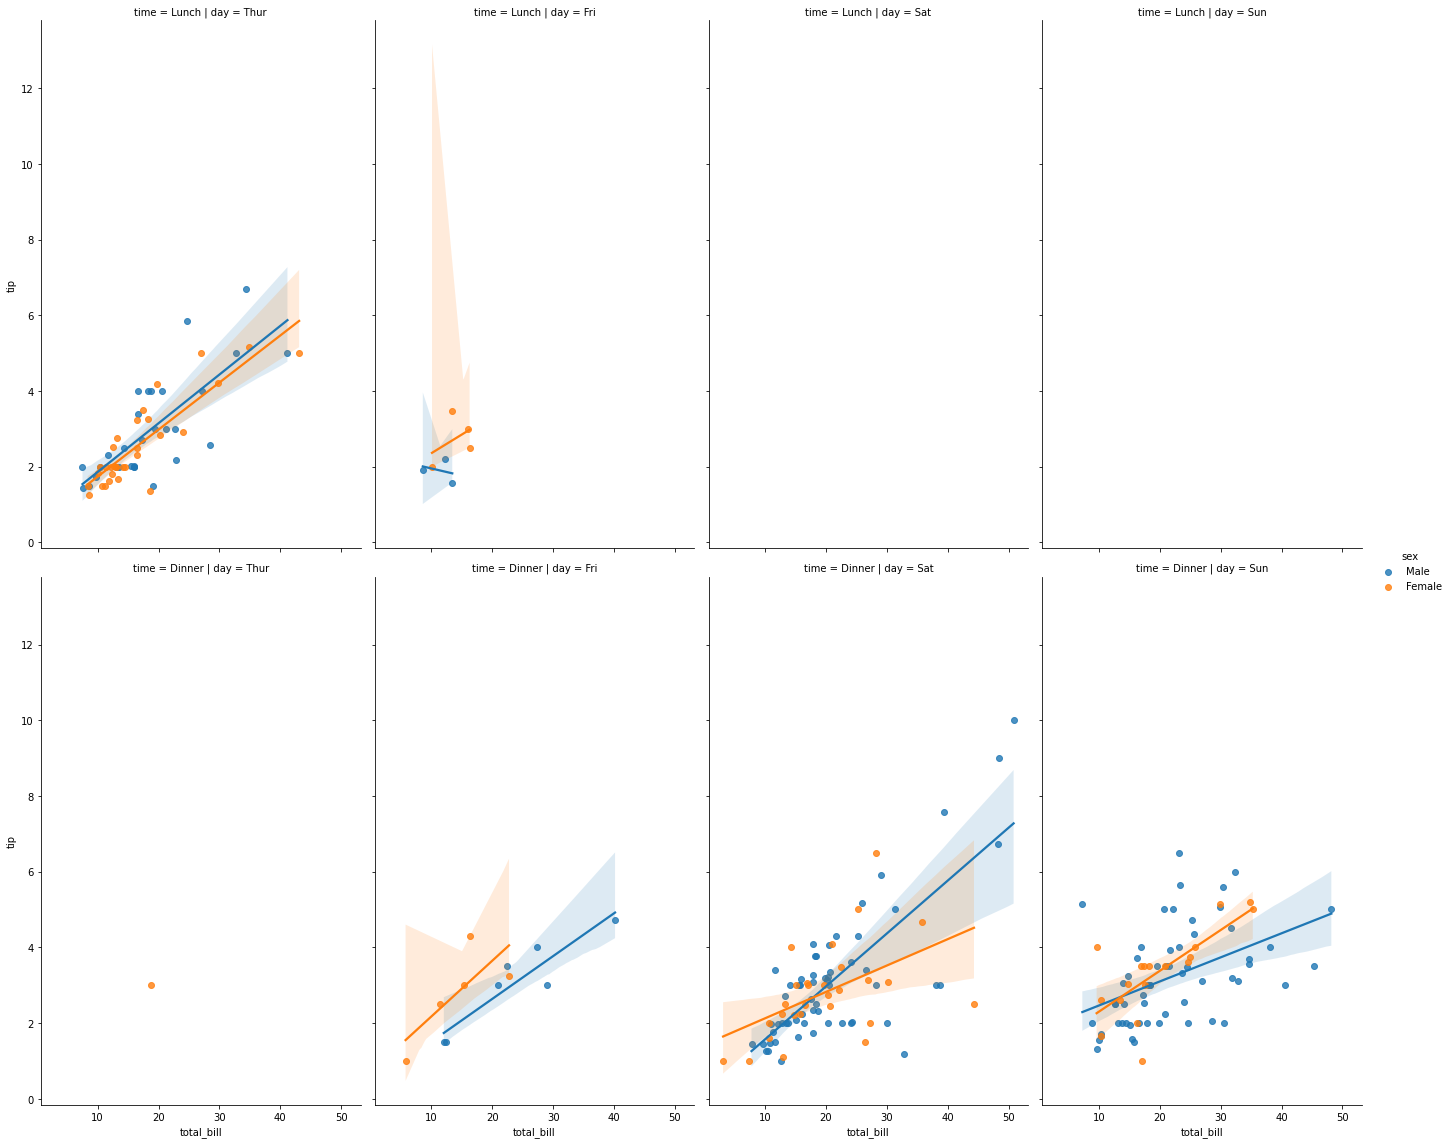

In [105]:
# to adjust size and aspect ratio
# param 'aspect' = <ratio between height/width>
sns.lmplot(x = 'total_bill', y= 'tip', data= tips, col='day', row = 'time', hue = 'sex',
          aspect = 0.6, size = 8)

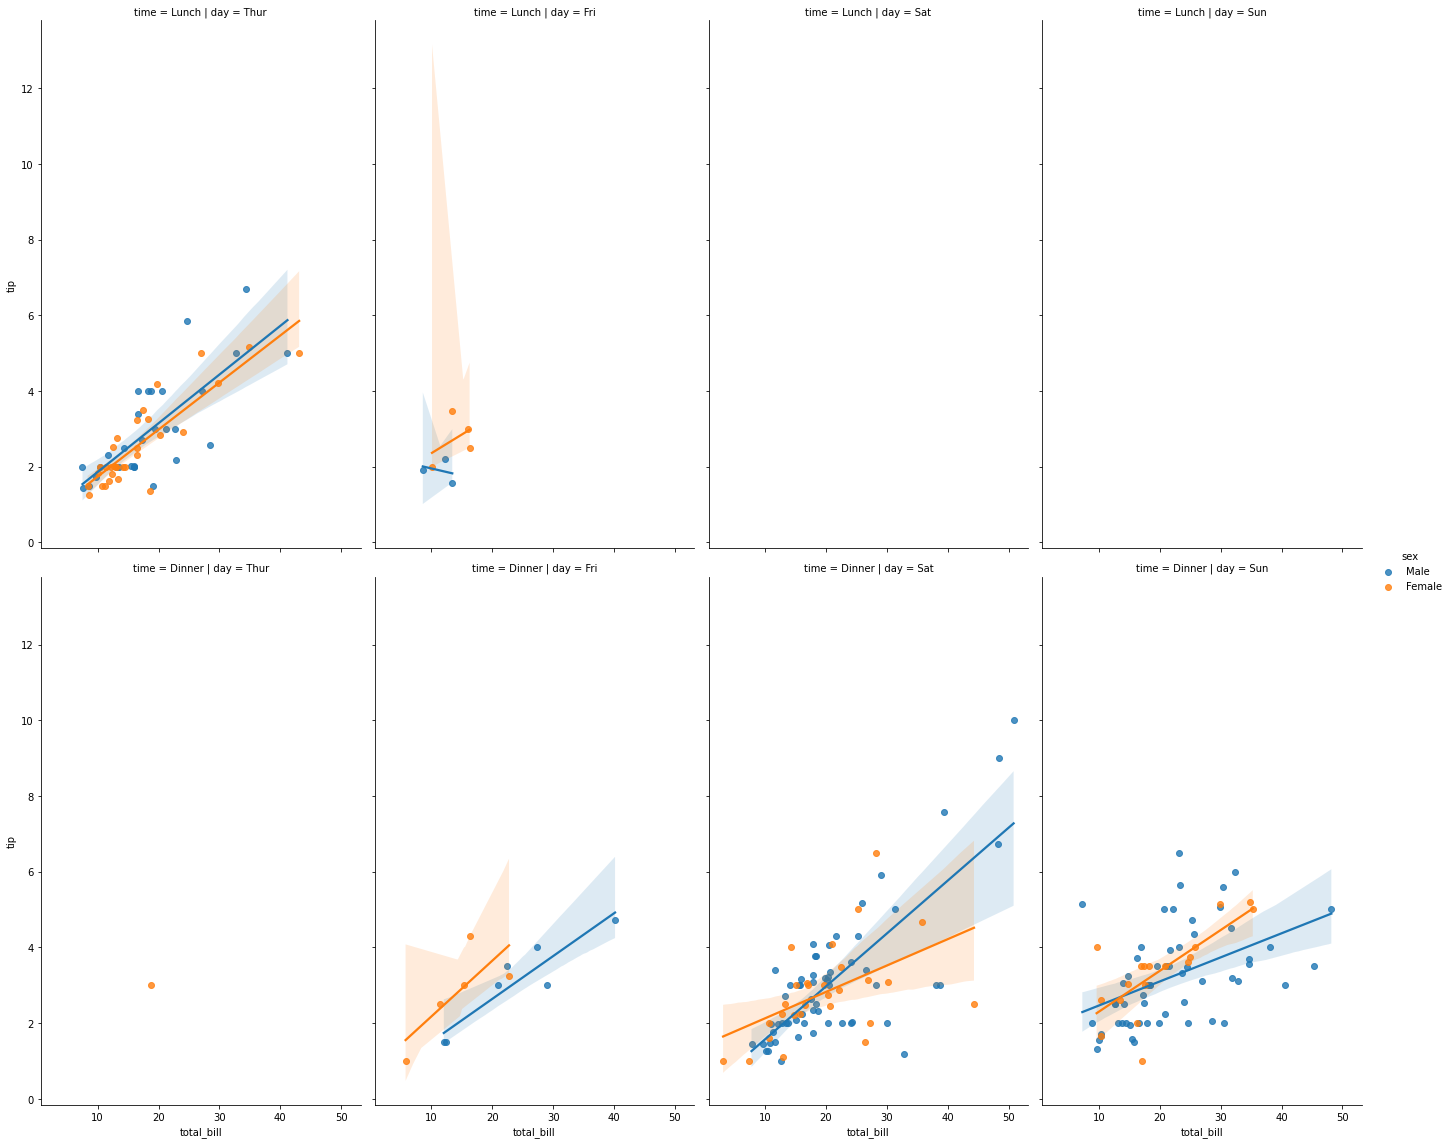

In [106]:
# 'size' has been deprecated and renamed to 'height' 
sns.lmplot(x = 'total_bill', y= 'tip', data= tips, col='day', row = 'time', hue = 'sex',
          aspect = 0.6, height = 8)

In [ ]:
# to adjust size and aspect ratio
# param 'aspect' = <ratio between height/width>
sns.lmplot(x = 'total_bill', y= 'tip', data= tips, col='day', row = 'time', hue = 'sex',
          aspect = 0.6, size = 8)